# Brooks Tawil
# ECE: 445 Machine Learning for Engineers
## Mini Jupyter Exercise 3

Consider the bivariate function $f : R^2 → R$ that is defined as follows:
<center>$f(w) = (w^2_1 + w_2 − 11)^2 + (w_1 + w^2_2 − 7)^2$</center><br/>

Provide an implementation of gradient descent that minimizes this function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Before attempting to perform Gradient Descent, we need to compute the gradient. This is shown below, and implemented as a function in python which takes a single list of  $w_1$ and $w_2$ as arguments and outputs a list.

The gradient is represented as a 2-length vector formed from taking the partial derivatives of $f$ with respect to $w_1$ and $w_2$:

<center>$∇f(w) = [\frac{d}{dw_1}f(w) \frac{d}{dw_2} f(w)]$

$\frac{d}{dw_1} f(w) = 4w_1\left(w_1^2+w_2-11\right)+2\left(w_1+w_2^2-7\right) = 4w_1^3+4w_1w_2-42w_1+2w_2^2-14$

$\frac{d}{dw_2} f(w) = 2\left(w_1^2+w_2-11\right)+4w_2\left(w_1+w_2^2-7\right) = 4w_2^3-26w_2+4w_1w_2+2w_1^2-22$</center>

In [2]:
# Evaluate the function
def functionF(w1, w2):
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2

# Evaluate the gradient
def gradientF(w):
    dw1 = 4*w[0]*(w[0]**2 + w[1] - 11) + 2*(w[0] + w[1]**2 - 7)
    dw2 = 2*(w[0]**2) + 4 * w[1] * (w[0] + w[1]**2 - 7) + 2*w[1] - 22
    
    return [dw1, dw2]

1. Initialize gradient descent from $w^0 = [0, −4]^T$.

In [3]:
w_0 = [0, -4]

A simple Gradient Descent function is implemented below. It takes a $w$ vector as a list, $γ$, max number of iterations, and the desired precision as arguments. It returns the resulting $w*$ and the number of iterations as a tuple. this function will also print out if $w*$ could not be found in the alloted amount of iterations.

In [4]:
def gradientDescent(w_0, gamma, maxIters, precision):
    # Initialize variables for the loop
    w_star = w_0
    iters = 0
    solutionPath = [w_star]
    while (np.linalg.norm(gradientF(w_star)) > precision) and (iters < maxIters):
        # Compute the greadient at this point and then adjust w*
        gradient = gradientF(w_star)
        w_star = [w_star[0] - (gamma*gradient[0]), w_star[1] - (gamma*gradient[1])]
        solutionPath.append(w_star)
        iters = iters + 1
    
    # Print if iteration maximum is reached
    if (iters >= maxIters):
        print ('Failed to find w* within ' + str(maxIters) + ' iterations') 
    
    return (w_star, iters, solutionPath)

- Run the algorithm with step size $γ = 0.005$ and, if the algorithm converges, output $w^∗$ and the number of iterations it took the algorithm to converge.

In [5]:
w_star, iters, solutionPath = gradientDescent(w_0, 0.005, 10000, 10**-12)

In [6]:
# Print the results
print ('w = ' + str(w_star))
print ('It took ' + str(iters) + ' iterations to find this w')

w = [-3.7793102533777407, -3.28318599128616]
It took 93 iterations to find this w


- Run the algorithm with step size $γ = 0.01$ and, if the algorithm converges, output $w^∗$ and the number of iterations it took the algorithm to converge.

In [7]:
w_star, iters, solutionPath = gradientDescent(w_0, 0.001, 10000, 10**-12)

In [8]:
# Print the results
print ('w = ' + str(w_star))
print ('It took ' + str(iters) + ' iterations to find this w')

w = [-3.7793102533777394, -3.2831859912861576]
It took 523 iterations to find this w


By simply doubling the size of gamma, the amount of iterations dramatically increased from 93 to 523. This change is obviously not a linear relationship and with a larger step size

2. Run gradient descent with step size γ = 0.01 for four different initializations: (i) $w^0 = [0, −4]^T$ (ii) $w^0 = [0.5, −4]^T$ (iii) $w^0 = [0, 4]^T$ (iv)$w^0 = [0.5, 4]^T$

In [9]:
w_list = [0] * 4
iters_list = [0] * 4
solution_path_list = [0] * 4

# First initialization
w_0 = [0, -4]
w_list[0], iters_list[0], solution_path_list[0] = gradientDescent(w_0, 0.01, 10000, 10**-12)

# Second initialization
w_0 = [0.5, -4]
w_list[1], iters_list[1], solution_path_list[1] = gradientDescent(w_0, 0.01, 10000, 10**-12)

# Third initialization
w_0 = [0, 4]
w_list[2], iters_list[2], solution_path_list[2] = gradientDescent(w_0, 0.01, 10000, 10**-12)

# Fourth initialization
w_0 = [0.5, 4]
w_list[3], iters_list[3], solution_path_list[3] = gradientDescent(w_0, 0.01, 10000, 10**-12)

for i in range(len(w_list)):
    print ('The ' + str(i+1) + ' initialization returned ' + str(w_list[i]) + ' after ' + str(iters_list[i]) + ' iterations.')

The 1 initialization returned [-3.7793102533777447, -3.283185991286164] after 38 iterations.
The 2 initialization returned [3.584428340330489, -1.848126526964375] after 91 iterations.
The 3 initialization returned [-2.8051180869527297, 3.1313125182505717] after 41 iterations.
The 4 initialization returned [2.9999999999999876, 2.00000000000003] after 111 iterations.


When looking at the found solutions, it would appear that these are local minima. The function is a multivarible polynomial with roots of four, so the exitence of multiple minima would be expected. The fact that gradient descent, when starting at different positions, has different outputs leads to this conclusion as well.

X: 0
250.0
227.05010000000016
206.52160000000012
188.29810000000015
172.26560000000023
158.31250000000023
146.3296000000002
136.21010000000018
127.84960000000024
121.14610000000025
116.00000000000016
112.3141000000001
109.99360000000007
108.94610000000006
109.08159999999997
110.31249999999987
112.55359999999985
115.72209999999983
119.73759999999972
124.52209999999961
129.9999999999996
136.09809999999956
142.74559999999946
149.87409999999934
157.41759999999934
165.31249999999932
173.49759999999924
181.91409999999914
190.50559999999913
199.21809999999914
207.99999999999906
216.80209999999897
225.577599999999
234.28209999999905
242.873599999999
251.31249999999892
259.561599999999
267.586099999999
275.35359999999895
282.83409999999895
289.999999999999
296.8260999999991
303.28959999999904
309.37009999999907
315.04959999999915
320.3124999999992
325.1455999999992
329.53809999999925
333.4815999999994
336.97009999999943
339.9999999999995
342.5700999999995
344.68159999999966
346.33809999999977
3

216.60159999999962
188.4716999999998
162.81919999999982
139.52769999999992
118.48320000000001
99.5741
82.69120000000005
67.72770000000007
54.57920000000014
43.14370000000013
33.32160000000012
25.015700000000116
18.1312000000001
12.575700000000076
8.259200000000046
5.094100000000012
2.9951999999999748
1.8796999999999386
1.6671999999998997
2.279699999999859
3.6415999999998188
5.67969999999978
8.32319999999974
11.503699999999697
15.155199999999663
19.21409999999963
23.619199999999594
28.311699999999565
33.235199999999544
38.33569999999951
43.5615999999995
48.86369999999949
54.19519999999948
59.51169999999948
64.77119999999948
69.93409999999948
74.96319999999947
79.82369999999953
84.48319999999951
88.91169999999958
93.0815999999996
96.96769999999962
100.54719999999968
103.79969999999972
106.70719999999976
109.25409999999984
111.42719999999991
113.21569999999996
114.61120000000004
115.6077000000001
116.20160000000017
116.39170000000026
116.17920000000035
115.56770000000041
114.5632000000005

5.823700000000276
5.955200000000043
6.927699999999781
8.819199999999487
11.710099999999166
15.683199999998813
20.823699999998425
27.219199999997997
34.95969999999753
44.13759999999702
54.84769999999648
67.1871999999959
81.25569999999522
97.15519999999452
114.99009999999379
134.86719999999306
156.8956999999922
181.1871999999913
207.8556999999904
237.01759999998936
X: 19
262.8420999999992
233.0521999999994
205.75969999999944
180.84819999999957
158.20369999999974
137.71459999999965
119.27169999999977
102.76819999999975
88.09969999999984
75.16419999999985
63.86209999999984
54.09619999999984
45.77169999999984
38.79619999999982
33.0796999999998
28.53459999999977
25.075699999999742
22.620199999999713
21.087699999999685
20.40019999999965
20.482099999999615
21.260199999999582
22.663699999999547
24.62419999999951
27.075699999999483
29.954599999999452
33.199699999999424
36.7521999999994
40.55569999999938
44.55619999999936
48.70209999999935
52.944199999999334
57.23569999999933
61.53219999999934
65

145.41969999999947
145.53459999999953
145.3516999999996
144.86019999999962
144.05169999999973
142.9201999999998
141.46209999999985
139.67619999999994
137.5637
135.12820000000005
132.37570000000017
129.3146000000002
125.95570000000029
122.31220000000036
118.39970000000045
114.23620000000051
109.84210000000058
105.24020000000064
100.45570000000069
95.51620000000074
90.45170000000078
85.29460000000083
80.07970000000086
74.84420000000088
69.62770000000089
64.47220000000088
59.42210000000087
54.52420000000083
49.8277000000008
45.38420000000073
41.247700000000656
37.474600000000564
34.123700000000454
31.256200000000312
28.93570000000016
27.228199999999983
26.202099999999774
25.928199999999546
26.479699999999287
27.932199999999
30.363699999998676
33.85459999999833
38.48769999999795
44.34819999999753
51.52369999999708
60.10419999999658
70.18209999999603
81.85219999999546
95.21169999999485
110.3601999999941
127.39969999999337
146.43459999999266
167.57169999999184
190.92019999999104
216.59169999

158.63359999999994
156.56770000000003
154.19520000000009
151.51970000000017
148.5472000000002
145.28610000000032
141.74720000000033
137.94370000000043
133.89120000000048
129.60770000000056
125.11360000000059
120.43170000000069
115.5872000000007
110.60770000000079
105.5232000000008
100.36610000000086
95.17120000000085
89.97570000000087
84.81920000000086
79.74370000000086
74.79360000000084
70.0157000000008
65.45920000000075
61.175700000000674
57.2192000000006
53.64610000000049
50.51520000000037
47.88770000000022
45.82720000000006
44.399699999999875
43.67359999999965
43.719699999999406
44.611199999999144
46.42369999999884
49.235199999998514
53.126099999998154
58.17919999999776
64.47969999999734
72.11519999999686
81.17569999999634
91.7535999999958
103.94369999999522
117.8431999999946
133.55169999999384
151.17119999999312
170.80609999999234
192.56319999999158
216.55169999999066
242.8831999999897
271.6716999999888
303.03359999998764
X: 39
504.35409999999854
468.9241999999988
436.071699999998

198.7781000000006
193.6402000000006
189.26370000000057
185.58020000000053
182.52370000000053
180.0306000000005
178.03970000000047
176.49220000000045
175.33170000000047
174.50420000000045
173.95810000000043
173.6442000000004
173.5157000000004
173.52820000000042
173.6397000000004
173.81060000000042
174.0037000000004
174.18420000000043
174.31970000000044
174.38020000000046
174.33810000000048
174.16820000000052
173.84770000000054
173.35620000000057
172.67570000000063
171.79060000000067
170.6877000000007
169.35620000000074
167.78770000000077
165.97620000000083
163.91810000000086
161.61220000000094
159.05970000000096
156.26420000000104
153.23170000000107
149.97060000000113
146.49170000000117
142.80820000000122
138.93570000000125
134.8922000000013
130.69810000000135
126.37620000000136
121.95170000000138
117.4522000000014
112.90770000000143
108.35060000000144
103.81570000000141
99.3402000000014
94.96370000000137
90.72820000000132
86.67810000000128
82.8602000000012
79.32370000000112
76.12020000

321.6637000000012
302.2496000000012
284.5277000000013
268.4032000000013
253.7837000000013
240.5792000000013
228.70210000000128
218.06720000000124
208.59170000000125
200.19520000000122
192.79970000000122
186.3296000000012
180.71170000000117
175.87520000000114
171.75170000000114
168.27520000000112
165.3821000000011
163.01120000000105
161.10370000000103
159.603200000001
158.455700000001
157.60960000000097
157.01570000000098
156.62720000000095
156.39970000000096
156.29120000000097
156.26210000000097
156.27520000000095
156.29570000000098
156.29120000000097
156.23170000000098
156.08960000000098
155.83970000000102
155.45920000000103
154.92770000000104
154.2272000000011
153.34210000000112
152.25920000000116
150.96770000000117
149.45920000000123
147.72770000000128
145.7696000000013
143.58370000000136
141.1712000000014
138.53570000000144
135.68320000000148
132.62210000000152
129.36320000000154
125.91970000000158
122.30720000000163
118.54370000000165
114.64960000000168
110.64770000000169
106.5632

32.4996999999989
38.35519999999855
45.26769999999813
53.31519999999769
62.57809999999722
73.13919999999675
85.0836999999962
98.49919999999564
113.47569999999496
130.10559999999433
148.48369999999363
168.7071999999929
190.875699999992
215.09119999999118
241.45809999999022
270.0831999999894
301.0756999999884
334.54719999998724
370.6116999999862
409.38559999998495
X: 73
526.7941000000015
485.4482000000018
446.81570000000187
410.780200000002
377.227700000002
346.0466000000022
317.12770000000216
290.36420000000226
265.65170000000234
242.8882000000024
221.97410000000247
202.8122000000025
185.3077000000025
169.3682000000025
154.90370000000246
141.8266000000025
130.05170000000243
119.49620000000243
110.07970000000239
101.72420000000238
94.35410000000232
87.89620000000232
82.27970000000225
77.43620000000224
73.29970000000218
69.80660000000218
66.89570000000211
64.50820000000209
62.587700000002044
61.08020000000201
59.934100000001976
59.10020000000194
58.53170000000191
58.18420000000189
58.01570

3.0141000000006626
2.6042000000005294
2.571700000000368
2.9682000000002016
3.847700000000004
5.266599999999797
7.283699999999559
9.960199999999304
13.359699999999028
17.54819999999872
22.594099999998388
28.568199999998033
35.54369999999764
43.59619999999722
52.80369999999675
63.246599999996285
75.00769999999576
88.17219999999521
102.82769999999465
119.06419999999397
136.9740999999933
156.65219999999252
178.19569999999175
201.70419999999086
227.27969999998996
255.02659999998914
285.05169999998816
317.4641999999872
352.3756999999861
389.90019999998503
430.1540999999837
X: 78
499.2256000000014
457.3997000000016
418.3072000000017
381.83170000000183
347.859200000002
316.278100000002
286.97920000000204
259.8557000000021
234.80320000000228
211.7197000000023
190.5056000000023
171.06370000000237
153.29920000000234
137.11970000000238
122.43520000000233
109.15810000000229
97.20320000000227
86.48770000000225
76.93120000000222
68.4557000000022
60.98560000000215
54.4477000000021
48.771200000002054
4

35.04959999999677
36.9076999999967
38.771199999996675
40.61969999999665
42.43519999999658
44.20209999999651
45.907199999996486
47.53969999999647
49.091199999996405
50.55569999999634
51.92959999999632
53.2116999999963
54.40319999999623
55.50769999999616
56.53119999999613
57.482099999996116
58.37119999999604
59.21169999999595
60.01919999999591
60.811699999995874
61.60959999999577
62.43569999999567
63.315199999995606
64.27569999999554
65.34719999999541
66.56209999999525
67.95519999999516
69.56369999999507
71.42719999999487
73.58769999999468
76.08959999999453
78.97969999999437
82.30719999999411
86.12369999999387
90.48319999999366
95.4420999999934
101.05919999999308
107.39569999999276
114.51519999999242
122.4836999999921
131.3695999999917
141.2436999999912
152.1791999999908
164.25169999999034
177.53919999998976
192.12209999998916
208.08319999998866
225.50769999998806
244.48319999998736
265.09969999998657
287.44959999998594
311.62769999998517
337.7311999999843
365.85969999998326
396.11519999

85.27219999999407
85.51809999999395
86.17219999999385
87.1876999999938
88.52019999999374
90.12769999999362
91.97059999999352
94.01169999999348
96.21619999999345
98.55169999999335
100.98819999999323
103.4980999999932
106.05619999999318
108.63969999999307
111.22819999999297
113.80369999999294
116.35059999999292
118.85569999999282
121.30819999999272
123.6996999999927
126.02419999999269
128.27809999999258
130.46019999999248
132.57169999999246
134.61619999999246
136.5996999999923
138.53059999999223
140.4196999999922
142.2801999999922
144.12769999999205
145.9801999999919
147.85809999999185
149.7841999999918
151.78369999999165
153.8841999999915
156.11569999999142
158.5105999999913
161.10369999999114
163.93219999999096
167.0356999999908
170.45619999999067
174.23809999999042
178.42819999999017
183.07569999998998
188.23219999998975
193.95169999998944
200.29059999998913
207.30769999998884
215.06419999998855
223.62369999998816
233.0521999999877
243.41809999998733
254.79219999998693
267.24769999998

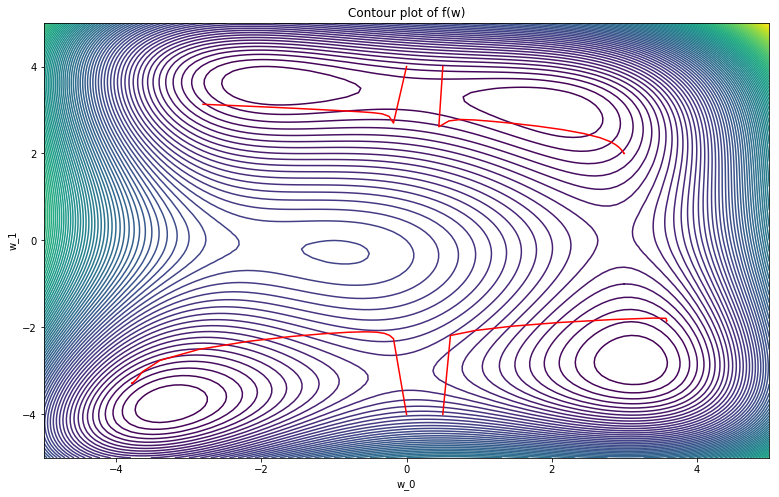

In [10]:
# Evaluate the function across the domain
x = np.arange(-5.0, 5.1, 0.1)
y = np.arange(-5.0, 5.1, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.empty([len(x), len(y)])

for i in range(len(x)):
    print('X: ' + str(i))
    for j in range(len(y)):
        Z[i][j] = functionF(x[i], y[j])
        print (Z[i][j])    
                
plt.figure(figsize=(13,8))
plt.title('Contour plot of f(w)')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.contour(X, Y, Z, 100)
for i in solution_path_list:
    plt.plot(np.transpose(i)[0], np.transpose(i)[1], '-r')
plt.show()


In [11]:
print (functionF(-1.8, 3.8))

47.491199999999985
